In [1]:
from copy import copy
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import DataFrame, read_csv
from pandas.plotting import autocorrelation_plot, lag_plot
from scipy import signal
from statsmodels.tsa.arima.model import ARIMA

from machine_learning.utils.utils_metric import mape, rmse

In [2]:
plt.style.use('seaborn-whitegrid')
sns.set_color_codes()

figsize = (12, 8)

In [3]:
def date_parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

### sales-of-shampoo dataset

In [4]:
sales_of_shampoo_filename = "../data/time_series/sales_of_shampoo_over_a_three_years.csv"
series = read_csv(sales_of_shampoo_filename, header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=date_parser)
series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64

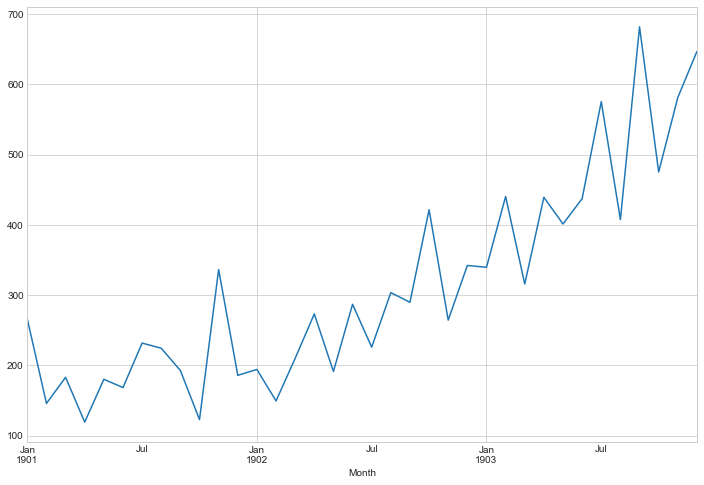

In [5]:
series.plot(figsize=figsize)
plt.show()

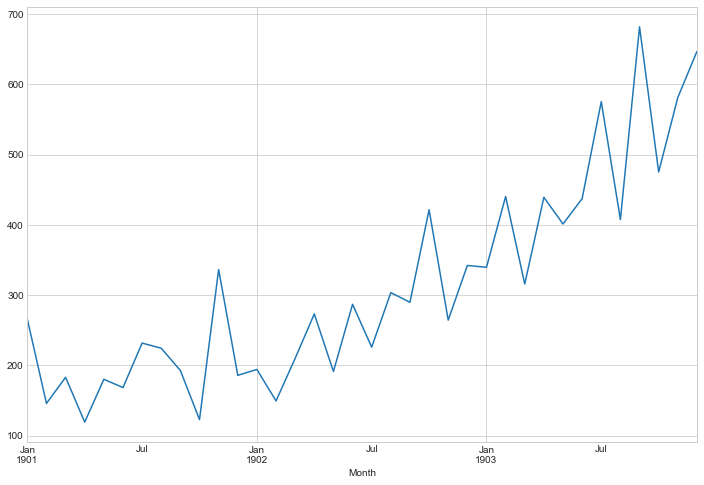

In [6]:
series.plot(figsize=figsize)
plt.show()

In [7]:
values = series.values
np.corrcoef(np.vstack([values[0:-1], values[1:]]))

array([[1.        , 0.71948224],
       [0.71948224, 1.        ]])

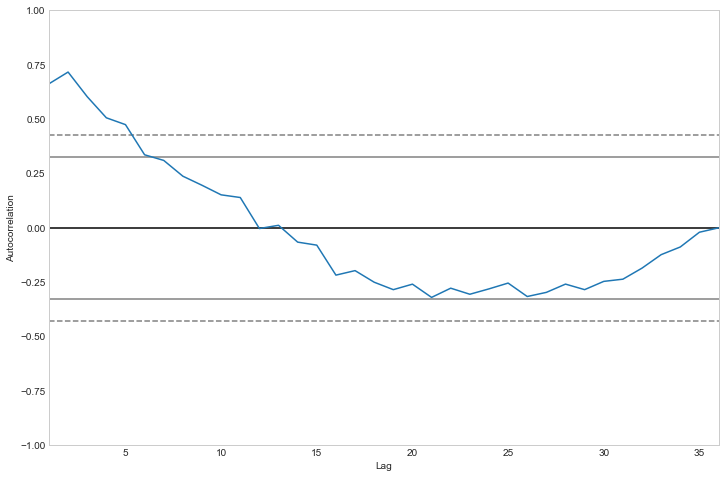

In [8]:
plt.figure(figsize=figsize)
autocorrelation_plot(series)
plt.show()

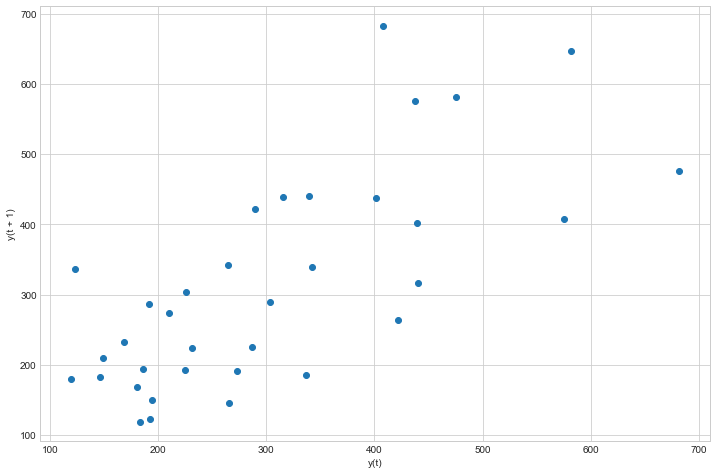

In [9]:
plt.figure(figsize=figsize)
lag_plot(series)
plt.show()

In [10]:
order = (5, 1, 0)
model = ARIMA(series, order=order)
arima_results = model.fit()

/Users/dnguyen/Dinh/machine_learning/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/dnguyen/Dinh/machine_learning/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/dnguyen/Dinh/machine_learning/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [11]:
arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           SARIMAX Results                                           
=====================================================================================================
Dep. Variable:     Sales of shampoo over a three year period   No. Observations:                   36
Model:                                        ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                                       Mon, 14 Mar 2022   AIC                            408.969
Time:                                               10:03:39   BIC                            418.301
Sample:                                           01-01-1901   HQIC                           412.191
                                                - 12-01-1903                                         
Covariance Type:                                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.798      -0.497       0.646
ar.L4          0.2519      0.340      0.742      0.458      -0.414       0.918
ar.L5          0.3344      0.210      1.593      0.111      -0.077       0.746
sigma2      4728.9609   1316.021      3.593      0.000    2149.607    7308.315
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):                 0.96
Prob(Q):                              0.44   Prob(JB):                         0.62
Heteroskedasticity (H):               1.07   Skew:                             0.28
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
residuals = DataFrame(arima_results.resid)
residuals.describe()

,0
count,36.000000
mean,21.936144
std,80.774430
min,-122.292030
25%,-35.040859
50%,13.147218
75%,68.848286
max,266.000000


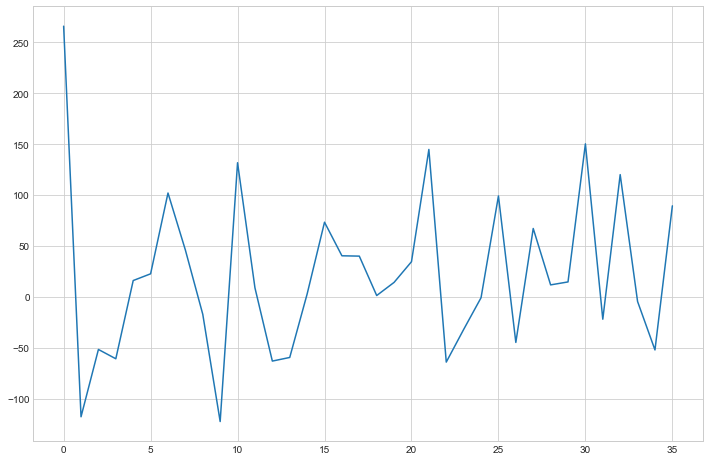

In [13]:
plt.figure(figsize=figsize)
plt.plot(residuals.values)
plt.show()

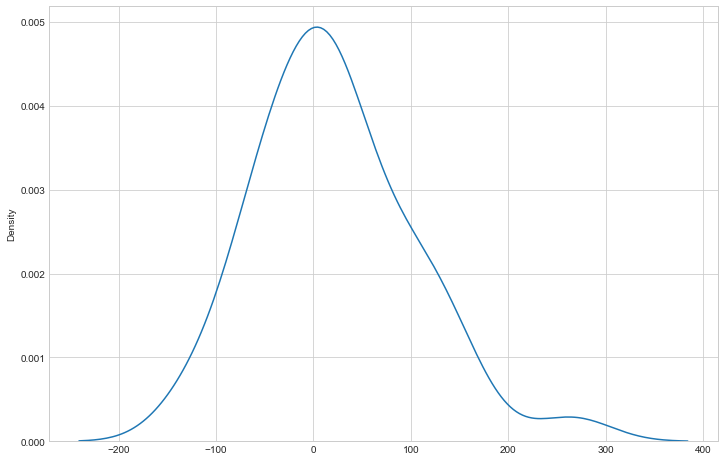

In [14]:
plt.figure(figsize=figsize)
sns.kdeplot(residuals.values[:, 0])
plt.show()

In [15]:
X = values
train_percentage = 0.66
train_size = int(len(X) * train_percentage)
X_train = X[:train_size]
X_test = X[train_size: ]
history = copy(X_train)
X_pred = []
for i in range(len(X_test)):
    model = ARIMA(history, order=order)
    arima_results = model.fit()
    x_pred = arima_results.forecast()[0]
    X_pred.append(x_pred)
    history = np.append(history, X_test[i])

In [16]:
rmse(X_test, X_pred), mape(X_test, X_pred)

(89.02105585194654, 0.13298060044453885)

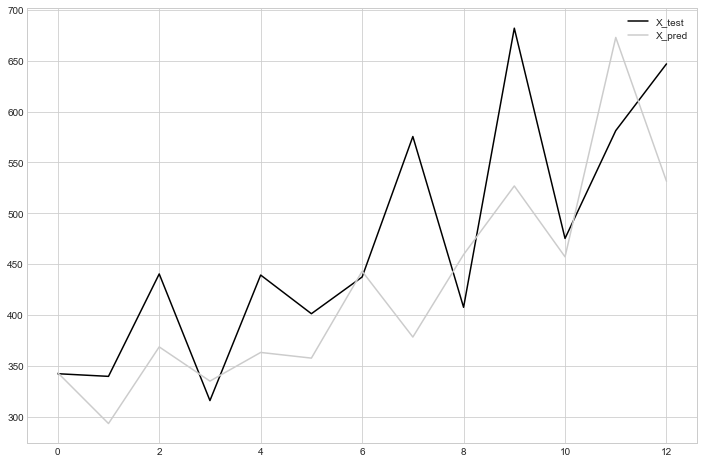

In [17]:
plt.figure(figsize=figsize)
plt.plot(X_test, color='0', label="X_test")
plt.plot(X_pred, color='0.8', label="X_pred")
plt.legend()
plt.show()